In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# dfault parameters
b = 0.3
m = 0.1
g = 9.8
l = 0.1

In [59]:
def calc(x, t):
    return np.array([ x[1], -b/m*x[1] -g/l*np.sin(x[0])])

In [60]:
A = np.array([[-b/m, -g/l], 
              [1, 0]])

def approx(x, t):
    return np.dot(x, A)

In [120]:
time = np.linspace(0, 2, 00)

In [121]:
time.shape

(1000,)

In [122]:
np.dot(A*0.4+ np.identity(2), x0)

array([-3.94,  0.14])

In [123]:
def my(x0, time):
    
    result = [x0]
    for i in range(1, time.shape[0]):
        delta_t = (time[i] - time[i-1])
        x_new = np.dot((np.identity(2) + delta_t*A), result[-1]) 
        result.append(x_new)
    return np.array(result)

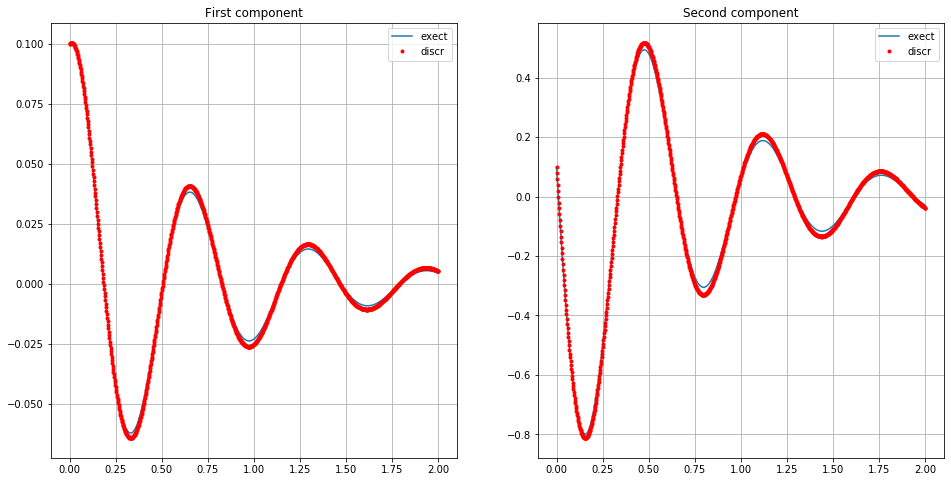

In [128]:
plt.figure(figsize=(16, 8))
x0 = [0.1, 0.1]
res1 = odeint(calc, x0, time).T
res2 = odeint(approx, x0, time).T
res3 = my(x0, time).T

plt.subplot(121)

plt.title("First component")
plt.plot(time, res1[0], label="exect")
# plt.plot(time, res2[0], "--k", label="approx")
plt.plot(time, res3[1], ".r", label="discr")

plt.grid()
plt.legend()

plt.subplot(122)
plt.title("Second component")
plt.plot(time, res1[1], label="exect")
# plt.plot(time, res2[1], "--k", label="approx")
plt.plot(time, res3[0], ".r", label="discr")

plt.grid()
plt.legend()